<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
عملیات ماتریسی
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین می‌خواهیم به برخی از عملیات‌های ماتریسی بپردازیم.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش اول
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش می‌خواهیم اطلاعات مجموعه‌داده‌ای که مربوط به مساحت جنگل‌های آتش‌گرفته در پرتغال است را بخوانید و در ادامه ستون <code>area</code> را به‌عنوان بردار <code>target</code> خارج کرده و بقیه‌ی ویژگی‌ها غیر از <code>month</code> و  <code>day</code> در قالب   ماتریسی مربعی قرار دهید (با انتخاب تعداد سطرهایی به تعداد ستون‌های ویژگی).
سطرهایی که <code>area</code> آن‌ها <code>0</code> شده است را نیز خارج کنید.
برای کسب اطلاعات بیشتر درباره‌ی این مجموعه‌داده نیز می‌توانید به  <a href="https://archive.ics.uci.edu/dataset/162/forest+fires">این لینک</a> مراجعه کنید.
</font>
</p>

In [1]:
import numpy as np
import pandas as pd

# Load the Forest Fires dataset from a CSV file
forest_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

forest_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [2]:
# Remove month and day columns
forest_data = forest_data.drop(columns=['month', 'day'])

# Remove (area = 0) Rows
forest_data = forest_data[forest_data['area'] != 0]


In [3]:
# square matrix , using random state for stable output

forest_data = forest_data.sample(forest_data.shape[1]-1,random_state=1000)

forest_data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
261,3,4,91.6,112.4,573.0,8.9,11.2,84,7.6,0.0,3.30
509,5,4,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
438,2,5,93.7,231.1,715.1,8.4,23.6,53,4.0,0.0,6.43
469,6,3,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13
477,4,3,93.7,101.3,423.4,14.7,26.1,45,4.0,0.0,7.36
232,6,4,91.0,129.5,692.6,7.0,18.7,43,2.7,0.0,103.39
273,4,6,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98
163,8,6,92.5,121.1,674.4,8.6,17.8,56,1.8,0.0,1.95
392,1,3,91.0,276.3,825.1,7.1,21.9,43,4.0,0.0,70.76
473,9,4,90.5,61.1,252.6,9.4,24.5,50,3.1,0.0,70.32


if rain column max minus min equals to zero, so we should drop this column because our matrix is not singular

In [4]:
forest_data.drop(columns='rain')

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area
261,3,4,91.6,112.4,573.0,8.9,11.2,84,7.6,3.30
509,5,4,91.0,166.9,752.6,7.1,21.1,71,7.6,2.17
438,2,5,93.7,231.1,715.1,8.4,23.6,53,4.0,6.43
469,6,3,91.0,14.6,25.6,12.3,13.7,33,9.4,61.13
477,4,3,93.7,101.3,423.4,14.7,26.1,45,4.0,7.36
232,6,4,91.0,129.5,692.6,7.0,18.7,43,2.7,103.39
273,4,6,84.4,27.2,353.5,6.8,4.8,57,8.5,8.98
163,8,6,92.5,121.1,674.4,8.6,17.8,56,1.8,1.95
392,1,3,91.0,276.3,825.1,7.1,21.9,43,4.0,70.76
473,9,4,90.5,61.1,252.6,9.4,24.5,50,3.1,70.32


if we don't use droping "rain" column, we should use another matrix with different name such as below

In [5]:
forest_data_2 = forest_data.sample(forest_data.shape[1]-1,random_state=1000)

forest_data_2

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
438,2,5,93.7,231.1,715.1,8.4,23.6,53,4.0,0.0,6.43
273,4,6,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98
232,6,4,91.0,129.5,692.6,7.0,18.7,43,2.7,0.0,103.39
509,5,4,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
477,4,3,93.7,101.3,423.4,14.7,26.1,45,4.0,0.0,7.36
473,9,4,90.5,61.1,252.6,9.4,24.5,50,3.1,0.0,70.32
261,3,4,91.6,112.4,573.0,8.9,11.2,84,7.6,0.0,3.30
392,1,3,91.0,276.3,825.1,7.1,21.9,43,4.0,0.0,70.76
163,8,6,92.5,121.1,674.4,8.6,17.8,56,1.8,0.0,1.95
469,6,3,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13


In [6]:
# Extract the features (matrix of features)
features = forest_data.iloc[:,:-1].to_numpy()
# features = forest_data_2.iloc[:,:-1].to_numpy()

# Extract the target (last column)
target = forest_data.iloc[:,-1].to_numpy()
# features = forest_data_2.iloc[:,:-1].to_numpy()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ادامه بر اساس متد تغییر مقیاس Min-max داده‌ها را نرمال کنید .
توضیحات مربوط به انواع روش‌های نرمال‌سازی داده‌ها را می‌توانید در <a href="https://en.wikipedia.org/wiki/Normalization_(statistics)">این لینک</a> مطالعه کنید.

</font>
</p>


In [7]:
# Min-Max normalization
min_val = features.min(axis=0)
max_val = features.max(axis=0)

features = (features - min_val) / (max_val - min_val)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون معادله‌ی ماتریسی زیر را حل کنید:
    <p>
    <code>coefficients * features = target</code>
     </p>
     <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
    در اینجا <code>coefficients</code> ماتریس ضرایب است و شما باید آن را گزارش دهید. البته برای تفسیر بهتر پاسخ، از شما می‌خواهیم در خروجی اهمیت <code>feature</code> های آن دیتاست را برای تعداد سطری که در معادله ماتریسی قرار دادیم، به‌صورت نزولی چاپ کنید. یعنی بر اساس ماتریس ضرایب به‌دست‌آمده تعیین کنید کدام ویژگی‌ها در تعیین میزان مساحت آتش‌گرفته جنگل‌های مورد نظر  به‌ترتیب از بقیه مهم‌تر بوده اند.
    </p>
    <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
    برای حل این معادله می‌توانید از ماژول جبر خطی نامپای استفاده کنید.
     </p>
</font>
</p>


In [8]:
# Solve the linear equation
import numpy.linalg as la

coefficients = la.lstsq(features, target)[0]
# coefficients = la.solve(features, target) # this is equal to "lstsq" command

importances = abs(coefficients)
sorted_idx = np.argsort(importances)[::-1]
# Print the coefficients
print('Coefficients:', coefficients)

Coefficients: [  40.18350572  -82.03149357   21.53422365 -144.54511098  113.38249143
 -147.62670061  103.78329896  -72.791555     80.14618674 -105.58328355]


C:\Users\Saleh\AppData\Local\Temp\ipykernel_14640\3399026660.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coefficients = la.lstsq(features, target)[0]


In [9]:
# TO-DO
# Print the interpretation
print('Interpretation of Coefficients:')
for i in sorted_idx:
    print(forest_data.columns[i], importances[i])

Interpretation of Coefficients:
ISI 147.62670060910622
DMC 144.54511098188812
DC 113.38249143015851
rain 105.58328354678586
temp 103.7832989637942
Y 82.0314935682818
wind 80.14618674267237
RH 72.79155500481818
X 40.18350571602925
FFMC 21.534223651317824


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش دوم
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش می‌خواهیم تصویری که در فایل‌های ضمیمه وجود دارد (<code>sample_img.jpg</code>) را بخوانید تا در ادامه خواسته‌های ذیل را برآورده کنید. دقت کنید که در این بخش <b>نباید</b> از کتابخانه‌های پردازش تصویر استفاده کنید.</font>
</p>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
# Load the image
image = Image.open("sample_img.jpg")
image = np.array(image)
image.shape

(1066, 800, 3)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ماتریسی در تصویر ضرب کنید که آن را نسبت به محور افقی قرینه کند. تصویر نهایی را نمایش دهید.
</font>
</p>


(1066, 800, 3)


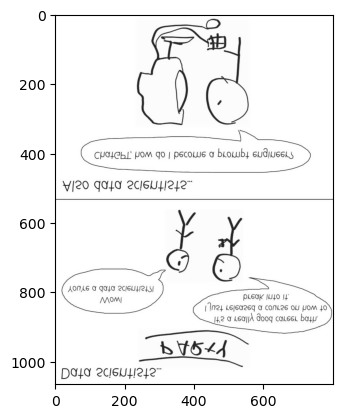

In [12]:
def flip(matrix):
       
    print(matrix.shape)
    height, width, channels = matrix.shape
    
    reflection_matrix = np.array([[1, 0], [0, -1]])
    
    reflected_pic = np.zeros((height, width, channels), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            pixel = matrix[y, x]
            new_coords = np.dot(reflection_matrix, [x, y])
            new_x, new_y = new_coords[0], new_coords[1]
            reflected_pic[new_y, new_x] = pixel

    return reflected_pic


flipped_img = flip(image)
plt.imshow(flipped_img)

In [13]:
def flip(matrix):
       
       flipped_lr = np.fliplr(matrix) # also we can use this numpy command that is equal to last function but with flipping in "y" dimension :)
       return flipped_lr

flipped_img = flip(image)

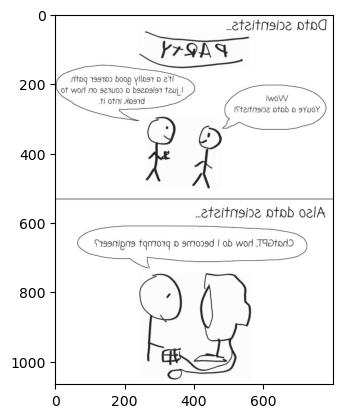

In [14]:
plt.imshow(flip(image))


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ماتریسی در تصویر ضرب کنید که آن را 90 درجه به طور پادساعتگرد بچرخاند. تصویر نهایی را نمایش دهید.
</font>
</p>


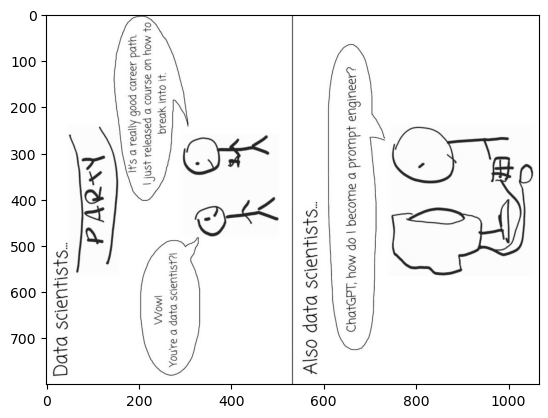

In [15]:
def rotate(src_img,angle_of_rotation=90,pivot_point=(0,0),shape_img=None):


    matrix = plt.imread(src_img)
    height, width, channels = matrix.shape
    
    rotation_matrix = np.array([[0, 1], [-1, 0]])
    
    new_height, new_width = width, height
    
    rotated_pic = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            pixel = matrix[y, x]
            new_coords = np.dot(rotation_matrix, [x, y])
            new_x, new_y = new_coords[0], new_coords[1]
            rotated_pic[new_y, new_x] = pixel


    return rotated_pic


rot_img = rotate("sample_img.jpg")
plt.imshow(rot_img)

In [16]:
def rotate(src_img,angle_of_rotation,pivot_point=(0,0),shape_img=None):
    new_img = np.rot90(src_img, k=angle_of_rotation/90) # also we can use this command that equal to last function :)
    return new_img

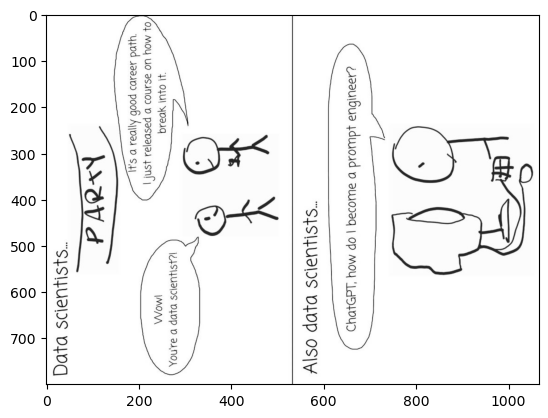

In [17]:
rotated_img = rotate(image, 90)
plt.imshow(rotated_img)